### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 6


### Дисциплина: Методы машинного обучения

##### Студент:  Бармина Ольга Константиновна
##### Группа:   НФИбд-01-19

## Москва 2022
***

### Вариант №2

1. Набор данных rock_paper_scissors 

2. Классы с метками 1,2,3 

3. Количество эпох 20 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds

1.	Загрузите заданный в индивидуальном задании набор данных с изображениями из Tensorflow Datasets с разбиением на обучающую и тестовую выборки.

In [2]:
ds_train = tfds.load("rock_paper_scissors", split='train')
df_train = tfds.as_dataframe(ds_train)
df_train.head(3)

,image,label
0,"[[[254, 254, 254], [253, 253, 253], [254, 254,...",2
1,"[[[254, 254, 254], [253, 253, 253], [254, 254,...",2
2,"[[[254, 254, 254], [253, 253, 253], [254, 254,...",0


2. Визуализируйте несколько изображений, отобранных случайным образом из обучающей выборки.

In [3]:
from PIL import Image, ImageOps

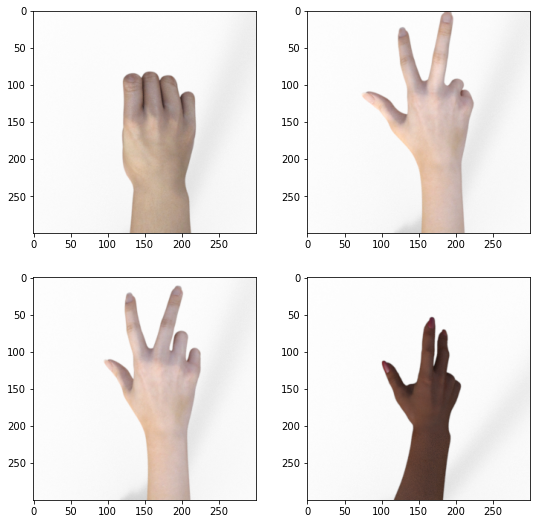

In [4]:
import random

fig, axes = plt.subplots(2, 2, figsize=(9, 9))
for i in range(4):
  ax = axes[i//2][i%2]
  index = random.randint(0, len(df_train))
  img = Image.fromarray(df_train.iloc[index]['image'])
  ax.imshow(img)

3.	Оставьте в наборе изображения двух классов, указанных в индивидуальном задании первыми. Обучите нейронные сети MLP и CNN задаче бинарной классификации изображений (архитектура сетей по вашему усмотрению). Количество эпох обучения указано в индивидуальном задании.

In [5]:
ds = tfds.load("rock_paper_scissors", split=['train','test'])

In [6]:
df_train = tfds.as_dataframe(ds[0])
df_test  = tfds.as_dataframe(ds[1])

# с помощью вспомогательной булевой таблицы отбросим строки со значением класса 2

indexNames = df_train[df_train['label'] == 2].index
df_train.drop(indexNames , inplace=True)

indexNames = df_test[df_test['label'] == 2].index
df_test.drop(indexNames , inplace=True)


df_train.shape, df_test.shape

((1680, 2), (248, 2))

In [7]:
train_labels = df_train['label'].to_numpy(dtype=np.float32)
test_labels = df_test['label'].to_numpy(dtype=np.float32)
train_labels.shape, test_labels.shape

((1680,), (248,))

In [8]:
train_images = np.zeros(shape=(df_train.shape[0],300,300,3), dtype=np.float32)
test_images  = np.zeros(shape=(df_test.shape[0],300,300,3), dtype=np.float32)
train_images.shape, test_images.shape

((1680, 300, 300, 3), (248, 300, 300, 3))

In [9]:
for idx in range(train_labels.shape[0]):
    train_images[idx,:,:,:] = np.array(Image.fromarray(df_train.iloc[idx]['image']))

for idx in range(test_labels.shape[0]):
    test_images[idx,:,:,:] = np.array(Image.fromarray(df_test.iloc[idx]['image']))

In [10]:
train_images /= 255
test_images  /= 255

In [11]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(300, 300, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

history_1 = model_1.fit(
    train_images,
    train_labels,
    epochs=20,
    batch_size=128,
    validation_data=(test_images, test_labels)
)

Epoch 1/20
14/14 [==============================] - 8s 495ms/step - loss: 74.7699 - accuracy: 0.5095 - val_loss: 2.9770 - val_accuracy: 0.5000
Epoch 2/20
14/14 [==============================] - 7s 471ms/step - loss: 1.3900 - accuracy: 0.5881 - val_loss: 1.2284 - val_accuracy: 0.5968
Epoch 3/20
14/14 [==============================] - 7s 473ms/step - loss: 0.6465 - accuracy: 0.7071 - val_loss: 0.7539 - val_accuracy: 0.5645
Epoch 4/20
14/14 [==============================] - 7s 472ms/step - loss: 0.3262 - accuracy: 0.8857 - val_loss: 0.7526 - val_accuracy: 0.6935
Epoch 5/20
14/14 [==============================] - 7s 479ms/step - loss: 0.3000 - accuracy: 0.8804 - val_loss: 0.9122 - val_accuracy: 0.6411
Epoch 6/20
14/14 [==============================] - 7s 485ms/step - loss: 0.3364 - accuracy: 0.8548 - val_loss: 1.5608 - val_accuracy: 0.4798
Epoch 7/20
14/14 [==============================] - 7s 485ms/step - loss: 0.3527 - accuracy: 0.8369 - val_loss: 0.8938 - val_accuracy: 0.6331
Epoch

In [12]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), input_shape=(300, 300, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

history_2 = model_2.fit(
    train_images,
    train_labels,
    epochs=20,
    batch_size=128,
    validation_data=(test_images, test_labels)
)

Epoch 1/20
14/14 [==============================] - 122s 9s/step - loss: 1.9652 - accuracy: 0.5417 - val_loss: 0.6978 - val_accuracy: 0.5161
Epoch 2/20
14/14 [==============================] - 111s 8s/step - loss: 0.3612 - accuracy: 0.8583 - val_loss: 0.3863 - val_accuracy: 0.8669
Epoch 3/20
14/14 [==============================] - 94s 7s/step - loss: 0.1155 - accuracy: 0.9690 - val_loss: 0.6702 - val_accuracy: 0.6532
Epoch 4/20
14/14 [==============================] - 91s 6s/step - loss: 0.0952 - accuracy: 0.9667 - val_loss: 0.3486 - val_accuracy: 0.8468
Epoch 5/20
14/14 [==============================] - 91s 6s/step - loss: 0.0352 - accuracy: 0.9929 - val_loss: 0.2180 - val_accuracy: 0.9194
Epoch 6/20
14/14 [==============================] - 90s 6s/step - loss: 0.0187 - accuracy: 0.9970 - val_loss: 0.2430 - val_accuracy: 0.8992
Epoch 7/20
14/14 [==============================] - 90s 6s/step - loss: 0.0078 - accuracy: 0.9994 - val_loss: 0.3345 - val_accuracy: 0.8790
Epoch 8/20
14/14 [

4.	Постройте кривые обучения нейронных сетей для показателей ошибки и аккуратности в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.

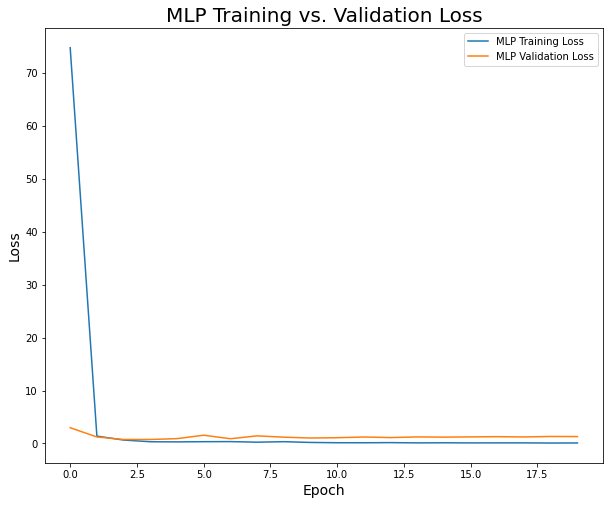

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(history_1.history['loss'], label='MLP Training Loss')
ax.plot(history_1.history['val_loss'], label='MLP Validation Loss')
ax.set_title('MLP Training vs. Validation Loss', size=20)
ax.set_xlabel('Epoch', size=14)
ax.set_ylabel('Loss', size=14)
ax.legend()

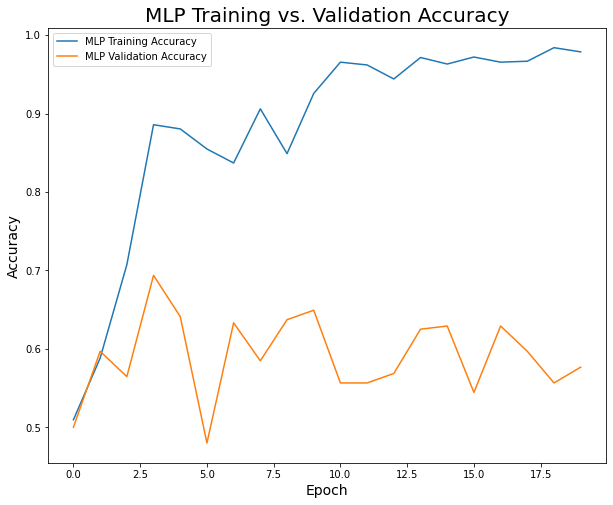

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(history_1.history['accuracy'], label='MLP Training Accuracy')
ax.plot(history_1.history['val_accuracy'], label='MLP Validation Accuracy')
ax.set_title('MLP Training vs. Validation Accuracy', size=20)
ax.set_xlabel('Epoch', size=14)
ax.set_ylabel('Accuracy', size=14)
ax.legend()

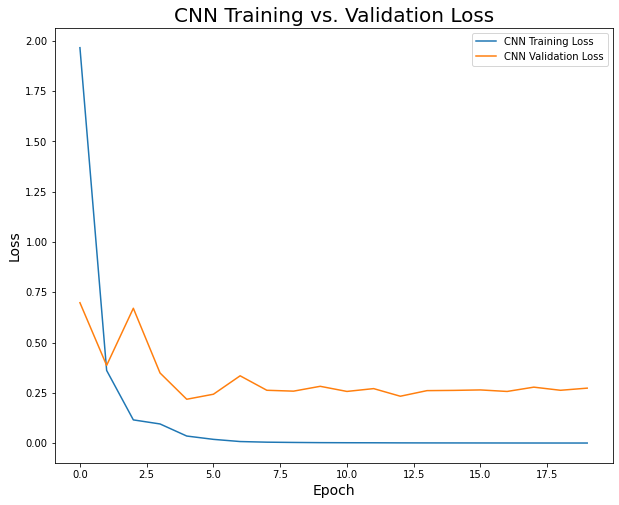

In [15]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(history_2.history['loss'], label='CNN Training Loss')
ax.plot(history_2.history['val_loss'], label='CNN Validation Loss')
ax.set_title('CNN Training vs. Validation Loss', size=20)
ax.set_xlabel('Epoch', size=14)
ax.set_ylabel('Loss', size=14)
ax.legend()

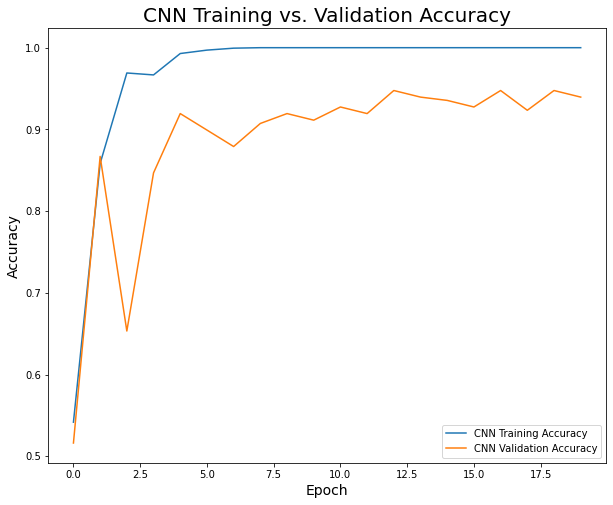

In [16]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(history_2.history['accuracy'], label='CNN Training Accuracy')
ax.plot(history_2.history['val_accuracy'], label='CNN Validation Accuracy')
ax.set_title('CNN Training vs. Validation Accuracy', size=20)
ax.set_xlabel('Epoch', size=14)
ax.set_ylabel('Accuracy', size=14)
plt.legend()

5.	Сравните качество бинарной классификации нейронными сетями при помощи матрицы ошибок для тестовой выборки. 



In [17]:
def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 0))

def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 1))

def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 0))

def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 1))

def confusion_matrix(y_true, y_predict):
    return np.array([
        [TN(y_true, y_predict), FP(y_true, y_predict)],
        [FN(y_true, y_predict), TP(y_true, y_predict)]
    ])



In [18]:
prediction1 = model_1.predict(test_images)
pred1 = np.array([1 if prob > 0.5 else 0 for prob in np.ravel(prediction1)])

confusion_matrix(test_labels, pred1)

array([[66, 58],
       [47, 77]])

In [19]:
prediction2 = model_2.predict(test_images)
pred2 = np.array([1 if prob > 0.5 else 0 for prob in np.ravel(prediction2)])

confusion_matrix(test_labels, pred2)

array([[118,   6],
       [  9, 115]])

6.	Визуализируйте ROC-кривые для построенных классификаторов на одном рисунке (с легендой) и вычислите площади под ROC-кривыми.



In [20]:
def true_false_positive(threshold_vector, y_test):
    true_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 1)
    true_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 0)
    false_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 0)
    false_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 1)

    tpr = true_positive.sum() / (true_positive.sum() + false_negative.sum())
    fpr = false_positive.sum() / (false_positive.sum() + true_negative.sum())

    return tpr, fpr

def roc_from_scratch(probabilities, y_test, partitions=100):
    roc = np.array([])
    for i in range(partitions + 1):
        
        threshold_vector = np.greater_equal(probabilities, i / partitions).astype(int)
        tpr, fpr = true_false_positive(threshold_vector, y_test)
        roc = np.append(roc, [fpr, tpr])
        
    return roc.reshape(-1, 2)

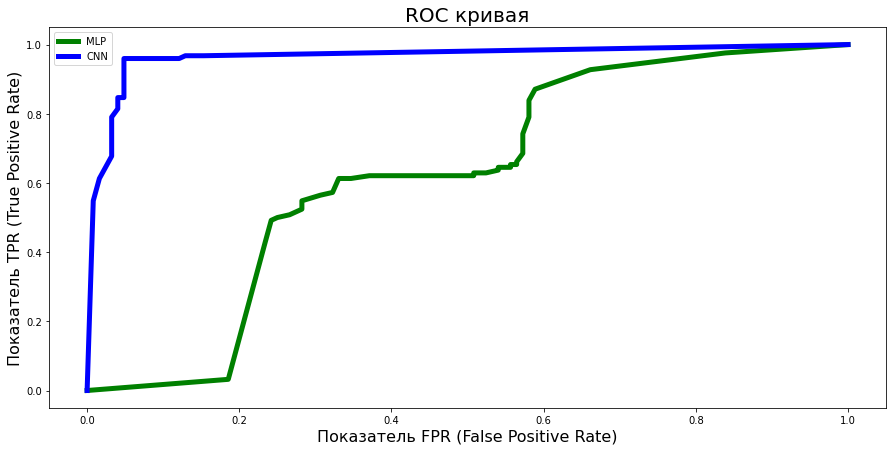

In [21]:
plt.figure(figsize=(15,7))

ROC1 = roc_from_scratch(prediction1.reshape(-1),test_labels,partitions=50)
ROC2 = roc_from_scratch(prediction2.reshape(-1),test_labels,partitions=50)
plt.plot(ROC1[:,0],ROC1[:,1],color='g',lw=5, label="MLP")
plt.plot(ROC2[:,0],ROC2[:,1],color='b',lw=5, label='CNN')
plt.title('ROC кривая',fontsize=20)
plt.xlabel('Показатель FPR (False Positive Rate)',fontsize=16)
plt.ylabel('Показатель TPR (True Positive Rate)',fontsize=16)
plt.legend()

In [22]:
from sklearn.metrics import roc_auc_score
print('area for MLP is ', roc_auc_score(test_labels, prediction1.reshape(-1)))
print('area for CNN is ', roc_auc_score(test_labels, prediction2.reshape(-1)))

area for MLP is  0.6231139438085327
area for CNN is  0.9662460978147763


7.	Оставьте в наборе изображения трех классов, указанных в индивидуальном задании. Обучите нейронные сети MLP и CNN задаче многоклассовой классификации изображений (архитектура сетей по вашему усмотрению). Количество эпох обучения указано в индивидуальном задании. 



In [23]:
ds = tfds.load("rock_paper_scissors", split=['train','test'])
df_train = tfds.as_dataframe(ds[0])
df_test  = tfds.as_dataframe(ds[1])

In [24]:
train_labels = df_train['label'].to_numpy(dtype=np.float32)
test_labels = df_test['label'].to_numpy(dtype=np.float32)

train_images = np.zeros(shape=(df_train.shape[0],300,300,3), dtype=np.float32)
test_images  = np.zeros(shape=(df_test.shape[0],300,300,3), dtype=np.float32)

In [25]:
for idx in range(train_labels.shape[0]):
    train_images[idx,:,:,:] = np.array(Image.fromarray(df_train.iloc[idx]['image']))

for idx in range(test_labels.shape[0]):
    test_images[idx,:,:,:] = np.array(Image.fromarray(df_test.iloc[idx]['image']))

train_images /= 255
test_images  /= 255

In [38]:
# преобразуем метки класса в массивы нулей, с единецей на месте индекса, равного значению метки 
def to_one_hot(labels, dimension=3):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, int(label)] = 1.
    return results

train_labels = to_one_hot(train_labels)
test_labels = to_one_hot(test_labels)

In [39]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(300, 300, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(3, activation="softmax")
])

model_3.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history_3 = model_3.fit(
    train_images,
    train_labels,
    epochs=20,
    batch_size=128,
    validation_data=(test_images, test_labels)
)

Epoch 1/20
20/20 [==============================] - 12s 555ms/step - loss: 153.0730 - accuracy: 0.3687 - val_loss: 21.3843 - val_accuracy: 0.3333
Epoch 2/20
20/20 [==============================] - 10s 506ms/step - loss: 6.2459 - accuracy: 0.4036 - val_loss: 2.1524 - val_accuracy: 0.3710
Epoch 3/20
20/20 [==============================] - 10s 503ms/step - loss: 1.5644 - accuracy: 0.5214 - val_loss: 1.2329 - val_accuracy: 0.6344
Epoch 4/20
20/20 [==============================] - 10s 498ms/step - loss: 0.6969 - accuracy: 0.6456 - val_loss: 1.2488 - val_accuracy: 0.5753
Epoch 5/20
20/20 [==============================] - 11s 567ms/step - loss: 0.5524 - accuracy: 0.7258 - val_loss: 1.3093 - val_accuracy: 0.4866
Epoch 6/20
20/20 [==============================] - 10s 506ms/step - loss: 0.9277 - accuracy: 0.6091 - val_loss: 2.1830 - val_accuracy: 0.3333
Epoch 7/20
20/20 [==============================] - 10s 501ms/step - loss: 0.7178 - accuracy: 0.6821 - val_loss: 1.2765 - val_accuracy: 0.5

In [40]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), input_shape=(300, 300, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_4.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history_4 = model_4.fit(
    train_images,
    train_labels,
    epochs=20,
    batch_size=128,
    validation_data=(test_images, test_labels)
)

Epoch 1/20
20/20 [==============================] - 156s 8s/step - loss: 4.2850 - accuracy: 0.4706 - val_loss: 1.0363 - val_accuracy: 0.3952
Epoch 2/20
20/20 [==============================] - 145s 7s/step - loss: 0.5560 - accuracy: 0.8591 - val_loss: 0.8894 - val_accuracy: 0.5806
Epoch 3/20
20/20 [==============================] - 138s 7s/step - loss: 0.2321 - accuracy: 0.9464 - val_loss: 0.6993 - val_accuracy: 0.7608
Epoch 4/20
20/20 [==============================] - 138s 7s/step - loss: 0.0765 - accuracy: 0.9913 - val_loss: 0.7249 - val_accuracy: 0.7608
Epoch 5/20
20/20 [==============================] - 145s 7s/step - loss: 0.0301 - accuracy: 0.9956 - val_loss: 0.7981 - val_accuracy: 0.7661
Epoch 6/20
20/20 [==============================] - 140s 7s/step - loss: 0.0159 - accuracy: 0.9988 - val_loss: 0.8694 - val_accuracy: 0.7581
Epoch 7/20
20/20 [==============================] - 140s 7s/step - loss: 0.0089 - accuracy: 0.9996 - val_loss: 1.0304 - val_accuracy: 0.7392
Epoch 8/20
20

8.	Сравните качество многоклассовой классификации нейронными сетями при помощи матрицы ошибок (для трех классов) для тестовой выборки. 



In [50]:
from sklearn.metrics import confusion_matrix

In [62]:
test_labels = df_test['label'].to_numpy(dtype=np.float32)

prediction3 = model_3.predict(test_images)
pred3 = np.array([np.argmax(prob) for prob in prediction3])

confusion_matrix(test_labels, pred3)

array([[75, 25, 24],
       [63, 57,  4],
       [33,  5, 86]])

In [63]:
prediction4 = model_4.predict(test_images)
pred4 = np.array([np.argmax(prob) for prob in prediction4])

confusion_matrix(test_labels, pred4)

array([[ 90,  13,  21],
       [  5, 119,   0],
       [ 33,  22,  69]])

9.	Постройте кривые обучения нейронных сетей для показателей ошибки и аккуратности в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.

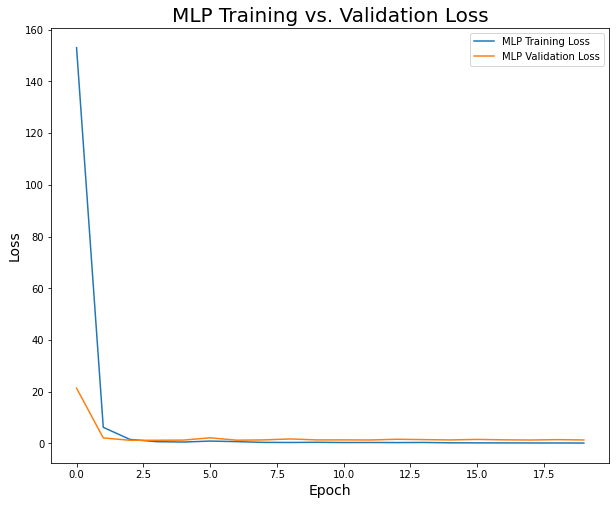

In [44]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(history_3.history['loss'], label='MLP Training Loss')
ax.plot(history_3.history['val_loss'], label='MLP Validation Loss')
ax.set_title('MLP Training vs. Validation Loss', size=20)
ax.set_xlabel('Epoch', size=14)
ax.set_ylabel('Loss', size=14)
ax.legend()

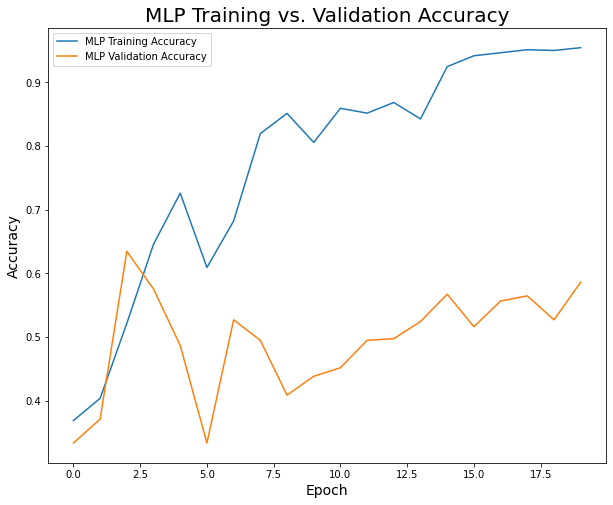

In [45]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(history_3.history['accuracy'], label='MLP Training Accuracy')
ax.plot(history_3.history['val_accuracy'], label='MLP Validation Accuracy')
ax.set_title('MLP Training vs. Validation Accuracy', size=20)
ax.set_xlabel('Epoch', size=14)
ax.set_ylabel('Accuracy', size=14)
ax.legend()














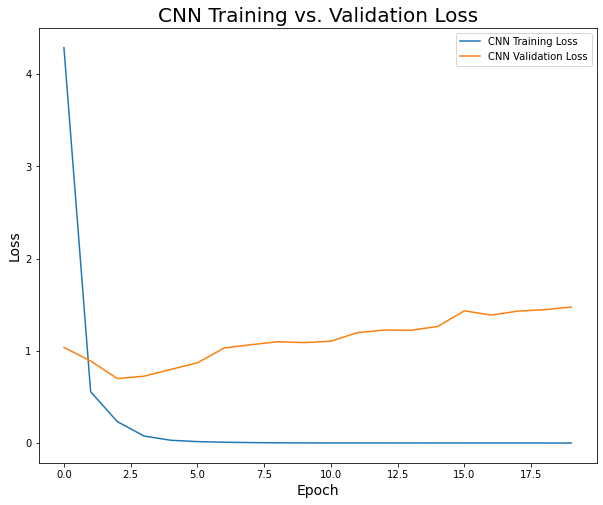

In [46]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(history_4.history['loss'], label='CNN Training Loss')
ax.plot(history_4.history['val_loss'], label='CNN Validation Loss')
ax.set_title('CNN Training vs. Validation Loss', size=20)
ax.set_xlabel('Epoch', size=14)
ax.set_ylabel('Loss', size=14)
ax.legend()

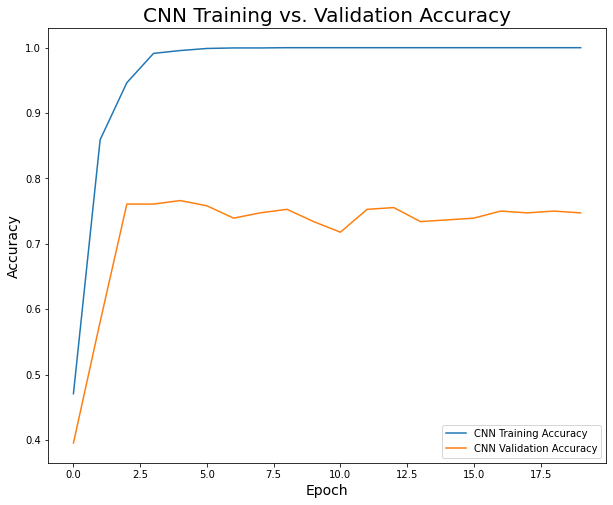

In [47]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(history_4.history['accuracy'], label='CNN Training Accuracy')
ax.plot(history_4.history['val_accuracy'], label='CNN Validation Accuracy')
ax.set_title('CNN Training vs. Validation Accuracy', size=20)
ax.set_xlabel('Epoch', size=14)
ax.set_ylabel('Accuracy', size=14)
plt.legend()